<a href="https://colab.research.google.com/github/alok412/Alok-Kumar/blob/main/Website_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Call Dictionary** --------------------------

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Import Data** ---------------

In [4]:
df = pd.read_csv("/content/data-export .csv", header=1)

**Cleaning Data** -------------

In [5]:
df.head()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526667,0.607595,4.673333,0.480000,1402
1,Organic Social,2024041719,208,267,132,32.097378,0.634615,4.295880,0.494382,1147
2,Direct,2024041723,188,233,115,39.939914,0.611702,4.587983,0.493562,1069
3,Organic Social,2024041718,187,256,125,32.160156,0.668449,4.078125,0.488281,1044
4,Organic Social,2024041720,175,221,112,46.918552,0.640000,4.529412,0.506787,1001


In [6]:
df.columns=df.iloc[0]
df.head()

,Direct,2024041623,237,300,144,47.526667,0.607595,4.673333,0.48,1402
0,Direct,2024041623,237,300,144,47.526667,0.607595,4.673333,0.480000,1402
1,Organic Social,2024041719,208,267,132,32.097378,0.634615,4.295880,0.494382,1147
2,Direct,2024041723,188,233,115,39.939914,0.611702,4.587983,0.493562,1069
3,Organic Social,2024041718,187,256,125,32.160156,0.668449,4.078125,0.488281,1044
4,Organic Social,2024041720,175,221,112,46.918552,0.640000,4.529412,0.506787,1001


In [7]:
df.columns = ("Channel group", "DateHour", "User", "Sessions", "Engaged Sessions", "Average engagement time per session", "Engaged sessions per user", "Events per session", "Engagement rate", "Event count")
df.head()

,Channel group,DateHour,User,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526667,0.607595,4.673333,0.480000,1402
1,Organic Social,2024041719,208,267,132,32.097378,0.634615,4.295880,0.494382,1147
2,Direct,2024041723,188,233,115,39.939914,0.611702,4.587983,0.493562,1069
3,Organic Social,2024041718,187,256,125,32.160156,0.668449,4.078125,0.488281,1044
4,Organic Social,2024041720,175,221,112,46.918552,0.640000,4.529412,0.506787,1001


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Channel group                        3182 non-null   object 
 1   DateHour                             3182 non-null   int64  
 2   User                                 3182 non-null   int64  
 3   Sessions                             3182 non-null   int64  
 4   Engaged Sessions                     3182 non-null   int64  
 5   Average engagement time per session  3182 non-null   float64
 6   Engaged sessions per user            3182 non-null   float64
 7   Events per session                   3182 non-null   float64
 8   Engagement rate                      3182 non-null   float64
 9   Event count                          3182 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 248.7+ KB


In [9]:
df["DateHour"]=pd.to_datetime(df["DateHour"],format="%Y%m%d%H", errors='coerce')
df.head()

,Channel group,DateHour,User,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001


In [10]:
numeric_cols=df.columns.drop(["Channel group","DateHour"])
df[numeric_cols]=df[numeric_cols].apply(pd.to_numeric,errors='coerce')
df["Hous"]=df["DateHour"].dt.hour

In [11]:
df.head()

,Channel group,DateHour,User,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hous
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [12]:
df.describe()

,DateHour,User,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hous
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


**Analysis and Creating graph**---------------

**Session and user over time**

In [13]:
sns.set(style="whitegrid")

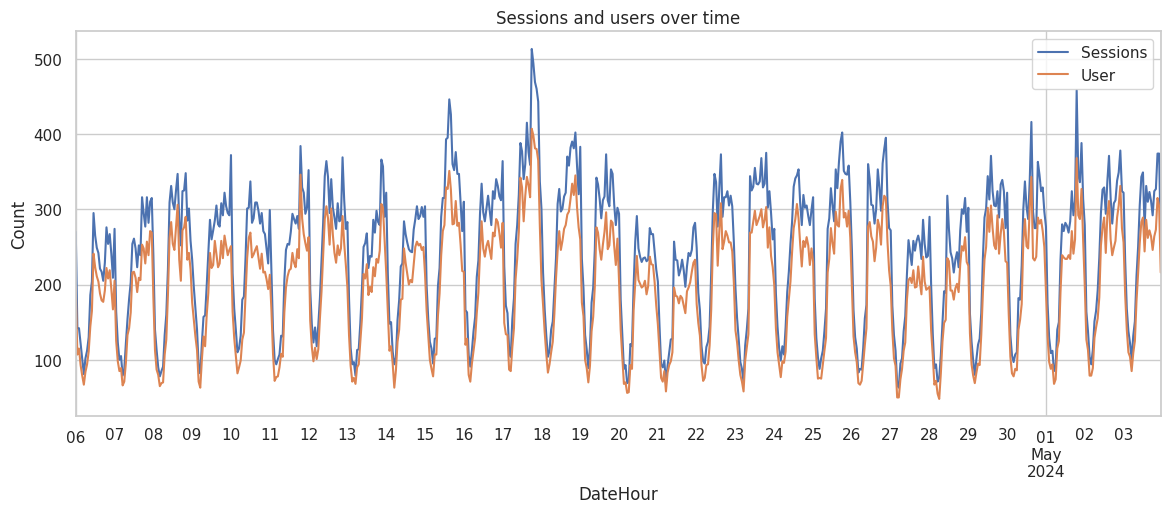

In [14]:
plt.figure(figsize=(14,5))
df.groupby("DateHour")[["Sessions","User"]].sum().plot(ax=plt.gca())
plt.title("Sessions and users over time")
plt.xlabel("DateHour")
plt.ylabel("Count")
plt.show()

**Total users by the channel**  ------

/tmp/ipython-input-15-3155749652.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Channel group", y="User", estimator=np.sum, palette="viridis")


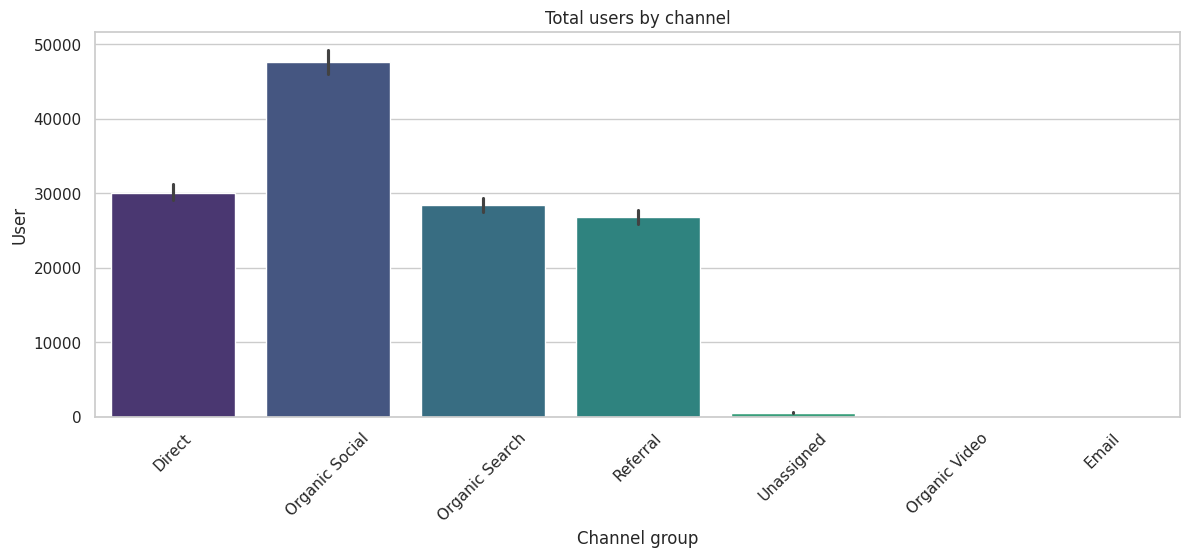

In [15]:
plt.figure(figsize=(14,5))
sns.barplot(data=df, x="Channel group", y="User", estimator=np.sum, palette="viridis")
plt.title("Total users by channel")
plt.xticks(rotation=45)
plt.show()

**Average engament time by channel** --------

/tmp/ipython-input-16-1190277379.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Channel group", y="Average engagement time per session", estimator=np.mean, palette="magma")


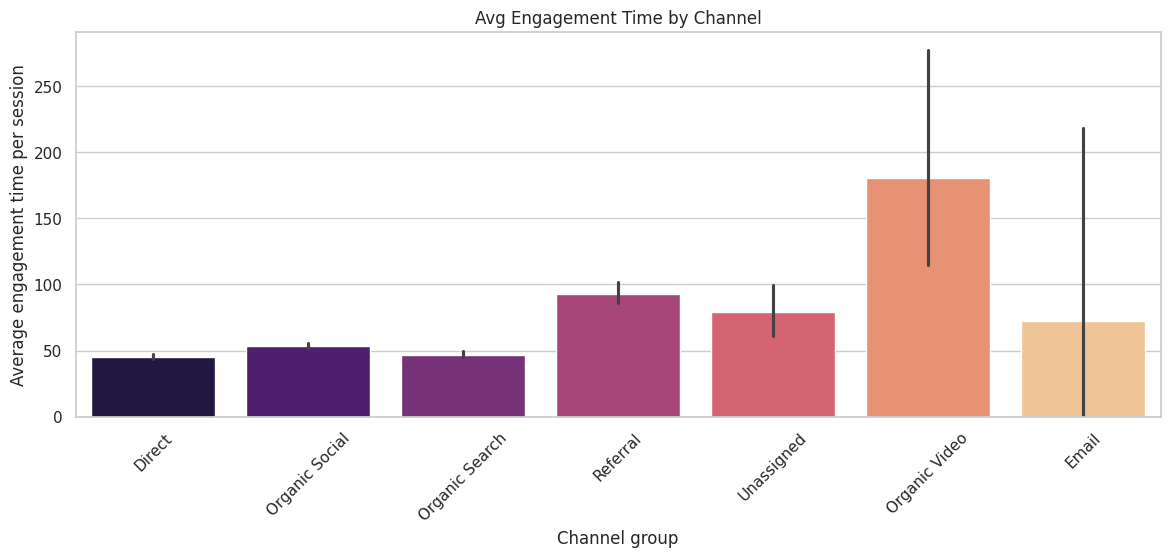

In [16]:
plt.figure(figsize=(14,5))
sns.barplot(data=df, x="Channel group", y="Average engagement time per session", estimator=np.mean, palette="magma")
plt.title("Avg Engagement Time by Channel")
plt.xticks(rotation=45)
plt.show()

**Engagment rate dustribution by channel** -----------

/tmp/ipython-input-17-780777684.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Channel group", y="Engagement rate", palette="viridis")


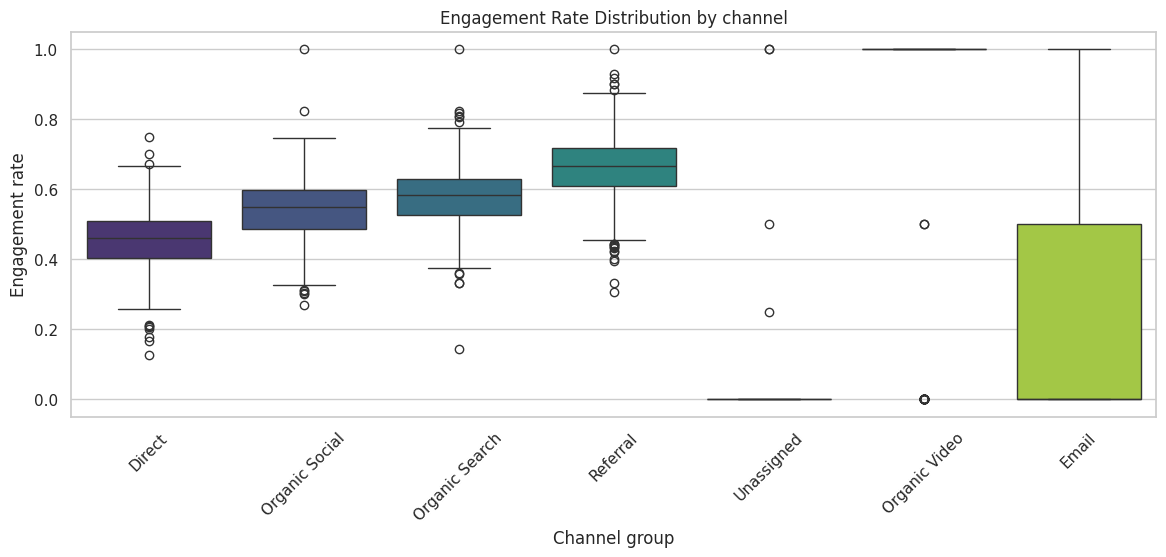

In [17]:
plt.figure(figsize=(14,5))
sns.boxplot(data=df, x="Channel group", y="Engagement rate", palette="viridis")
plt.title("Engagement Rate Distribution by channel")
plt.xticks(rotation=45)
plt.show()

**Compair with Engaged vs Non-engaged sessions** ----------

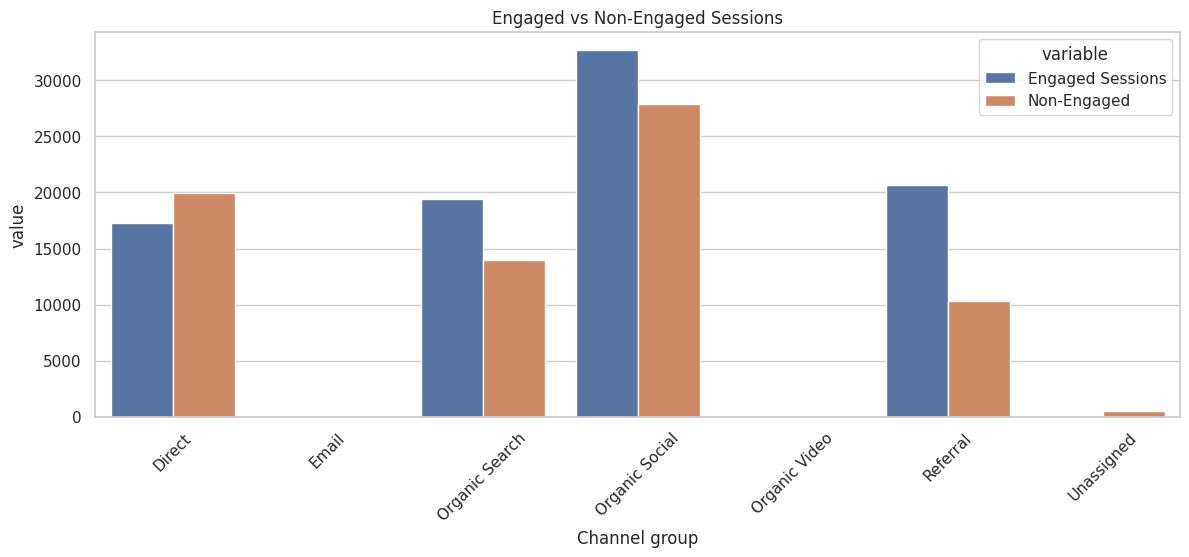

In [18]:
session_df=df.groupby("Channel group")[["Sessions","Engaged Sessions"]].sum().reset_index()
session_df["Non-Engaged"]=session_df["Sessions"]-session_df["Engaged Sessions"]
session_df_melted=session_df.melt(id_vars="Channel group", value_vars=["Engaged Sessions","Non-Engaged"])
plt.figure(figsize=(14,5))
sns.barplot(data=session_df_melted, x="Channel group", y="value", hue="variable")
plt.title("Engaged vs Non-Engaged Sessions")
plt.xticks(rotation=45)
plt.show()

**Traffic by hour and channel** ------------

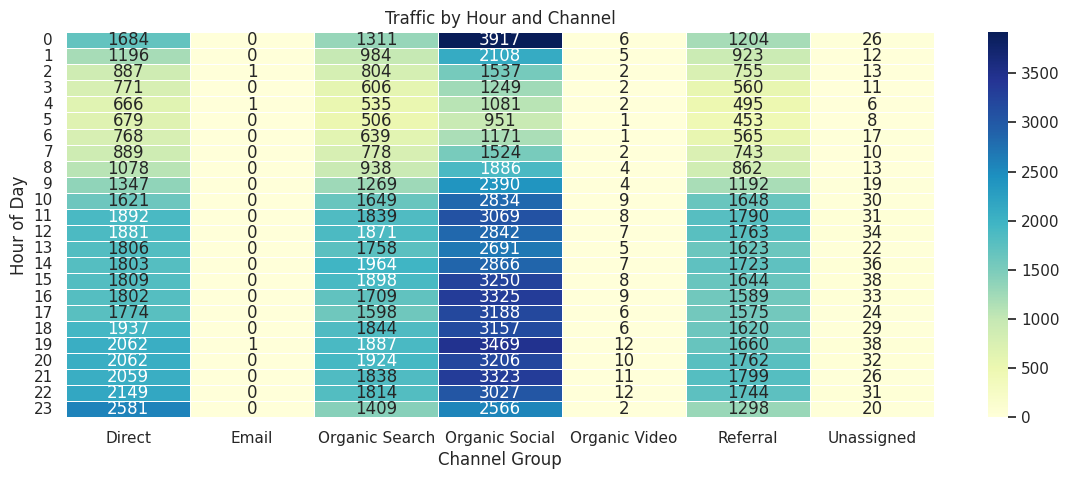

In [19]:
heatmap_data = df.groupby(["Hous", "Channel group"])["Sessions"].sum().unstack().fillna(0)
plt.figure(figsize=(14,5))
sns.heatmap(heatmap_data,cmap="YlGnBu", linewidths=.5,annot=True,fmt='.0f')
plt.title("Traffic by Hour and Channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour of Day")
plt.show()

**Engagement rate vs session over time** ------------------

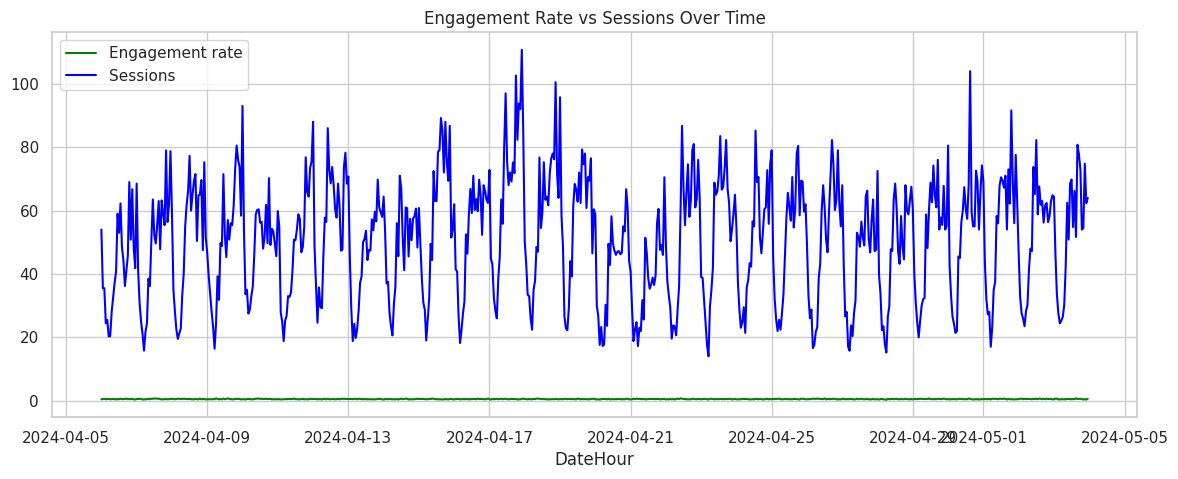

In [20]:
df_plot=df.groupby("DateHour")[["Engagement rate","Sessions"]].mean().reset_index()
plt.figure(figsize=(14,5))
plt.plot(df_plot["DateHour"], df_plot["Engagement rate"], label="Engagement rate", color="green")
plt.plot(df_plot["DateHour"], df_plot["Sessions"], label="Sessions",color="blue")
plt.title("Engagement Rate vs Sessions Over Time")
plt.xlabel("DateHour")
plt.legend()
plt.grid(True)
plt.show()

****